In [2]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn import datasets
from fastcluster import linkage

import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
iris = datasets.load_iris()
iris.data.shape

(150, 4)

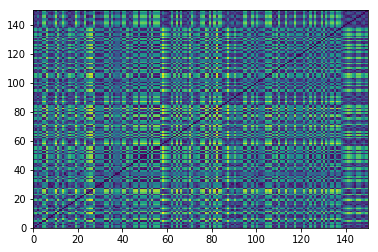

In [8]:
X = iris.data[np.random.permutation(N),:]

dist_mat = squareform(pdist(X))

plt.pcolormesh(dist_mat)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

In [9]:
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

In [10]:
ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat)

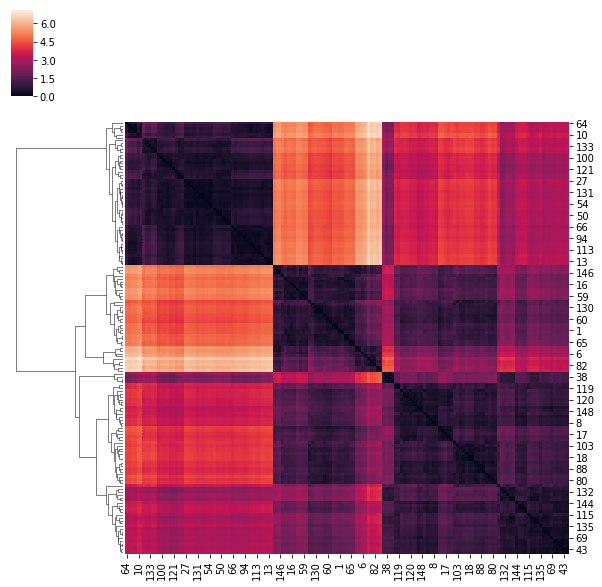

In [50]:
import seaborn as sns
cg = sns.clustermap(dist_mat)
cg.ax_col_dendrogram.set_visible(False)

In [42]:
import pandas as pd
sim_matrix = pd.DataFrame(index = dist_mat)